In [1]:
from keras.models import model_from_json
import numpy
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.transform as trans
import random as r
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
import glob
def create_data(src, mask, label=False, resize=(128,128,128)):
    files = glob.glob(src + mask, recursive=True)
    imgs = []
    for file in files:
        img = io.imread(file, plugin='simpleitk')
        if label:
            img[img == 4] = 1
            img[img != 1] = 0
            img = img.astype('float32')
        else:
            img = (img-img.mean()) / img.std()
        img = trans.resize(img, resize, mode='constant')
        imgs.append(img)
    name = 'y1' if label else 'x1'
    np.save(name, np.array(imgs)[..., np.newaxis].astype('float32'))
    print('Saved', len(files), 'to', name)

In [4]:
# create_data('Testing/HGG_LGG/', '**/*T1c*.mha', label=False, resize=(32,32,32))
create_data('uploader', '**/**.mha', label=True, resize=(32,32,32))

Saved 1 to y1


/home/nm/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
x1 = np.load('x1.npy')
y = np.load('y.npy')
pred = loaded_model.predict(x1[:50])

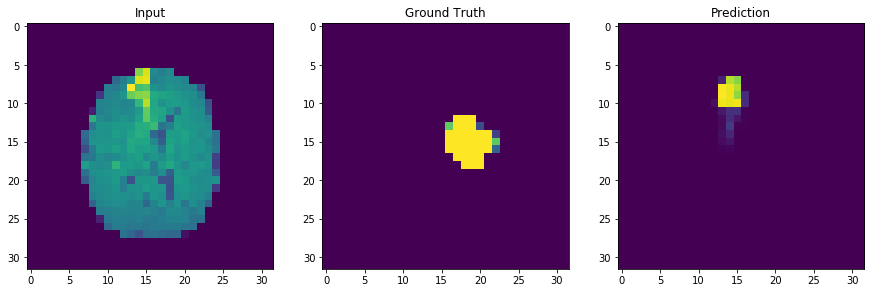

In [6]:
import random as r
from matplotlib import pyplot as mp
num = int(x1.shape[1]/2)
i = int(r.random() * pred.shape[0])
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.title('Input')
plt.imshow(x1[i, num, :, :, 0])
mp.savefig('input.png', bbox_inches='tight')


plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(y[i, num, :, :, 0])
mp.savefig('ground_truth.png', bbox_inches='tight')

plt.subplot(133)
plt.title('Prediction')
plt.imshow(pred[i, num, :, :, 0])
mp.savefig('pred.png', bbox_inches='tight')

plt.show()